<a href="https://colab.research.google.com/github/KhiladiHB/Suicide-Analysis-In-India/blob/main/Suicide_Analysis_in_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Suicide Analysis in India** 

Statewise 2001-2012

In [ ]:
# read dataset
from google.colab import files
uploaded = files.upload()

Saving Suicides in India 2001-2012.csv.zip to Suicides in India 2001-2012.csv.zip


In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "Suicides in India 2001-2012.csv.zip" with length 1312915 bytes


# **Importing packages**

In [ ]:
# import lib
import numpy as np #linear algebra
import pandas as pd #data processing
import seaborn as sns #for making statistical graphics
import os #for interacting with the operating system. 
import matplotlib.pyplot as plt #collection of functions that make matplotlib work
%matplotlib inline 
#sets the backend of matplotlib to the 'inline' backend

# **Description**

According to the recent report of WHO, India is the 6th most depressed country in the world. What makes us so,have you ever pondered? A picture speaks more than 1000 words,a well knwon saying,with this thought here is my notebook that shows an explanatory analysis of the Suicide rate in India from 2001-2012.


**About the dataset**

This data set contains yearly suicide detail of all the States and union territories of India by various parameters from 2001 to 2012.

**Data Source**

 data.world.com(https://data.world/rajanand/suicides-in-india)

**Data Shape**

237519 entries and  7 column.



**State**

Name of the state in India.

We have data of 35 states.


**Year**

The year in which suicides were committed.


**Type_code**

It has 5 values which are:

1) Suicide causes

2) Education status

3) By means adopted

4) Professional profile

5) Social status


**Type**

It consists of various factors and causes of death.


**Gender**

1)Male
2)Female


**Age Group**

 It consists of various age groups.

1)0-100+

2)0-14

3)15-29

4)30-44

5)45-59

6)60+


**Total**

It consists of total number of suicides in that particular row.


**Reading CSV file**

In [ ]:
data=pd.read_csv("Suicides in India 2001-2012.csv.zip")

# **Data preprocessing**

After importing standard libraries and loading the data in a pandas DataFrame, we have a look at the data



In [ ]:
data.head(10)

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
5,A & N Islands,2001,Causes,Family Problems,Female,0-14,0
6,A & N Islands,2001,Causes,Ideological Causes/Hero Worshipping,Female,0-14,0
7,A & N Islands,2001,Causes,Other Prolonged Illness,Female,0-14,0
8,A & N Islands,2001,Causes,Property Dispute,Female,0-14,0
9,A & N Islands,2001,Causes,Fall in Social Reputation,Female,0-14,0


The data does not contain any NULL values.



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [ ]:
#Shape of Dataset
data.shape

(237519, 7)

# ***Data Cleaning***

As part of data cleaning, we replace some states which are mentioned separately in the dataset like A & N Islands (Ut), A & N Islands, as both these entries are for Andaman and Nicobar Islands and there is no point in having separate entries for them. Similarly, other multiple entries for states and type codes have been replaced as in the below:


In [ ]:
# rename states
data.replace('A & N Islands (Ut)', 'A & N Islands', inplace=True)
data.replace('Chandigarh (Ut)', 'Chandigarh', inplace=True)
data.replace('D & N Haveli (Ut)', 'D & N Haveli', inplace=True)
data.replace('Daman & Diu (Ut)', 'Daman & Diu', inplace=True)
data.replace('Lakshadweep (Ut)', 'Lakshadweep', inplace=True)
data.replace('Delhi (Ut)', 'Delhi', inplace=True)

In [ ]:
# rename Type
data.replace('Bankruptcy or Sudden change in Economic','Bankruptcy or Sudden change in Economic Status', inplace=True)
data.replace('By Other means (please specify)', 'By Other means', inplace=True)
data.replace('Not having Children(Barrenness/Impotency','Not having Children (Barrenness/Impotency', inplace=True)

In [ ]:
#Generate descriptive statistics.
data.describe()

,Year,Total
count,237519.000000,237519.000000
mean,2006.500448,55.034477
std,3.452240,792.749038
min,2001.000000,0.000000
25%,2004.000000,0.000000
50%,2007.000000,0.000000
75%,2010.000000,6.000000
max,2012.000000,63343.000000


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
#Checking missing values
data.isna().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

# **Total Suicides in India**

2001-2012

In [ ]:
#Total count of deeaths in india during 2001 to 2012.and the count is near by 1.30 cr 
data['Total'].sum()

13071734

In [ ]:
data2 = data.copy()

# **Data exploration and visualization**


# **Total Suicides in India Year wise**




In [ ]:
data_year_total = data.groupby(data["Year"]).agg({"Total":"sum"})

In [ ]:
data_year_total.reset_index(inplace=True)

In [ ]:
data_year_total.head(12)

,Year,Total
0,2001,976464
1,2002,993648
2,2003,997622
3,2004,1023137
4,2005,1025201
5,2006,1062991
6,2007,1103667
7,2008,1125082
8,2009,1144033
9,2010,1211322


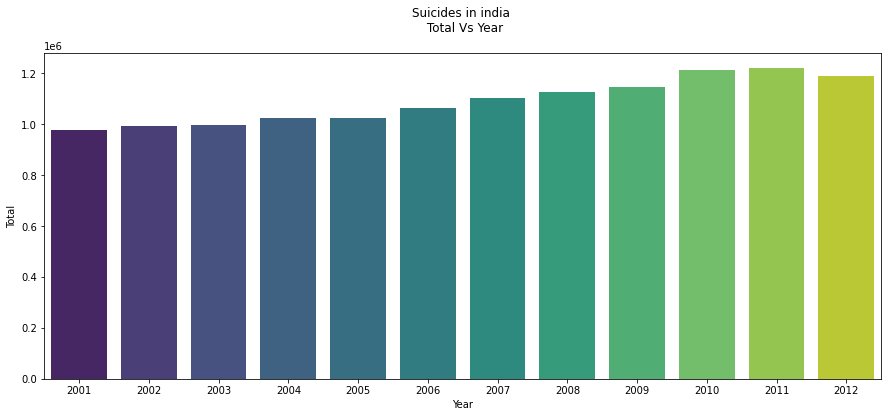

In [ ]:
plt.figure(figsize=(15,6))
plt.title("Suicides in india \n Total Vs Year\n")
sns.barplot(x="Year" , y="Total" , data=data_year_total , palette="viridis" )

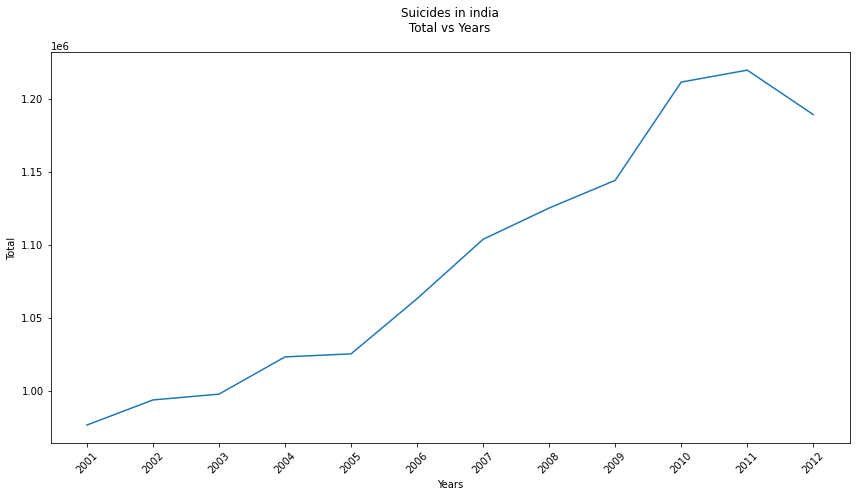

In [ ]:
D = data.groupby('Year').Total.sum()
x = D.index.values
y = D.values
plt.figure(figsize = (12,7))
year = range(2001,2013)
plt.plot(D.index, D.values)
plt.xticks(year, rotation = 45)
plt.title("Suicides in india\n Total vs Years \n")
plt.ylabel("Total")
plt.xlabel("Years")
plt.tight_layout()
plt.show()

*We* see a gradual increase in the number of suicides every year, however,  in 2012 we have a dip in the numbers as compared to 2011.

# **Total Suicides In India Gender Wise**

A quick look at the gender-wise distribution of people committing suicide tells us that we have more males committing suicide than women.

In [ ]:
data_gender = data.groupby("Gender").agg({"Total":"sum"})
data_gender.reset_index(inplace=True)
data_gender


,Gender,Total
0,Female,4702974
1,Male,8368760


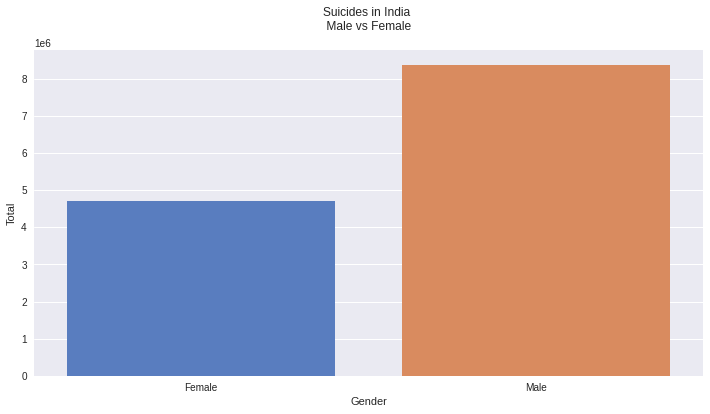

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Suicides in India \n Male vs Female \n")
g = sns.barplot(x="Gender" , y="Total" , data=data_gender, palette="muted" )

# **Total Suicides In India Age Wise**

In [ ]:
cause=data[data['Type_code']=='Causes'].reset_index(drop=True)
cause=cause.drop("Type_code", axis=1)

,age,count
0,0-14,32685
1,15-29,509776
2,30-44,488713
3,45-59,294333
4,60+,115467


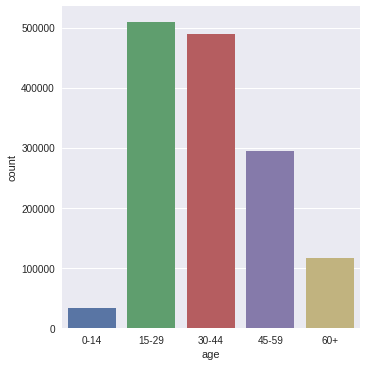

In [ ]:
def Age_group(age):
    sum=cause[cause["Age_group"]==age]['Total'].sum()
    return sum

age_group=["0-14", "15-29", "30-44", "45-59", "60+"]
value=[]
for age in age_group:
    #dict[age]=Age_group(age)
    value.append(Age_group(age))


#age=pd.DataFrame.from_dict(dict, orient='index')
age=pd.DataFrame({"age":age_group,"count":value})
sns.catplot(x="age", y="count", data=age, kind="bar")
age

# **Total Suicides In India State Wise**


we look at the state-wise suicide numbers to find out that the states with the highest number of suicides are Maharashtra, West Bengal, Andhra Pradesh, Tamil Nadu, and Karnataka.

In [ ]:
grp = data2.groupby('State')['Total'].sum()
total_suicides = pd.DataFrame(grp).reset_index().sort_values('Total',ascending=False)
total_suicides
total_suicides = total_suicides[2:]

In [ ]:
total_suicides

,State,Total
20,Maharashtra,901945
37,West Bengal,849936
30,Tamil Nadu,818691
1,Andhra Pradesh,814059
16,Karnataka,734825
17,Kerala,538946
19,Madhya Pradesh,451535
11,Gujarat,330858
6,Chhattisgarh,302354
25,Odisha,267234


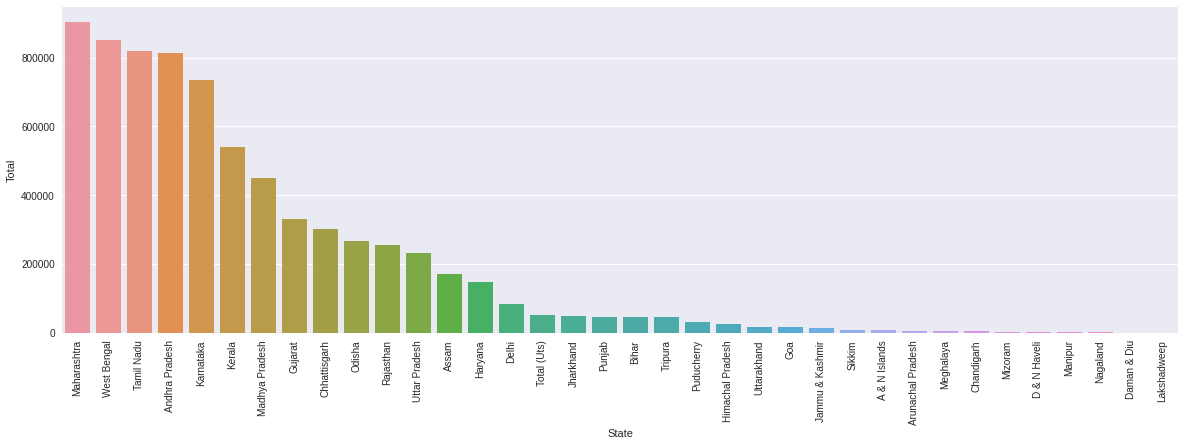

In [ ]:
fig , ax = plt.subplots(figsize=(20,6))
g=sns.barplot(x='State',y='Total',data=total_suicides)
var=g.set_xticklabels(g.get_xticklabels(),rotation=90)

# **Distribution By Type code**

In [ ]:
data_Type_code = data.groupby("Type_code").agg({"Total":"sum"})
data_Type_code.reset_index(inplace=True)
data_Type_code


,Type_code,Total
0,Causes,1440974
1,Education_Status,4367793
2,Means_adopted,1455931
3,Professional_Profile,1439243
4,Social_Status,4367793


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


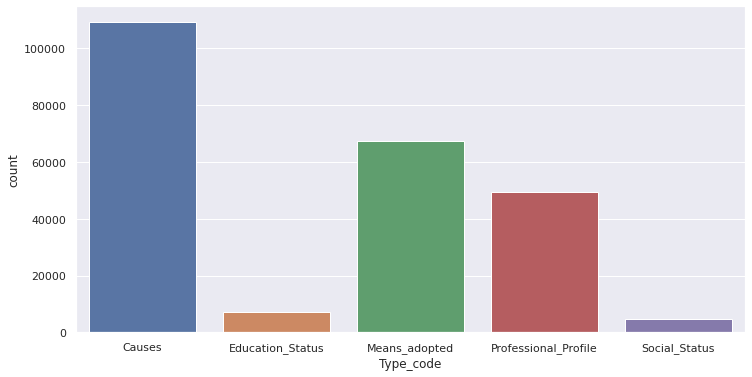

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(data['Type_code'])

# **Total Suicides In India Social Status Wise**

In [ ]:
data_by_code = data[data['Type_code'] == 'Social_Status']
data_by_code['Type'].unique()

data_by_social = data_by_code.groupby('Type')['Total'].sum()
data_by_social

Type
Divorcee             45816
Married            3065322
Never Married       954903
Seperated           115413
Widowed/Widower     186339
Name: Total, dtype: int64

Total people who have their social status mentioned in the data 4560


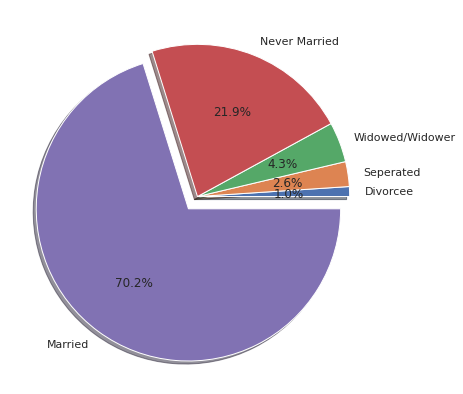

In [ ]:
data_by_social_type = pd.DataFrame(data_by_social).reset_index().sort_values('Total')
print('Total people who have their social status mentioned in the data {}'.format(data_by_code.shape[0]))
labels = data_by_social_type['Type']
explode = (0,0,0,0,0.1)
plt.figure(figsize = (13,7))
plt.pie(data_by_social_type['Total'],labels = labels,autopct='%1.1f%%',explode = explode,shadow=True)
plt.show()

*Of* the 3349 people who have suicided, 70.2%(highest) of them were married and 1%(lowest) were divorced.

# **Total Suicides In India Professional Profile Wise**

In [ ]:
data_by_code = data[data['Type_code'] == 'Professional_Profile']
data_by_code['Type'].unique()

data_by_proffession = data_by_code.groupby('Type')['Total'].sum()
data_by_proffession 

Type
Farming/Agriculture Activity         197923
House Wife                           285243
Others (Please Specify)              469147
Professional Activity                 39204
Public Sector Undertaking             30786
Retired Person                        11334
Self-employed (Business activity)     78112
Service (Government)                  23325
Service (Private)                    115472
Student                               74323
Unemployed                           114374
Name: Total, dtype: int64

Total people who have their professional mentioned in the data 49263


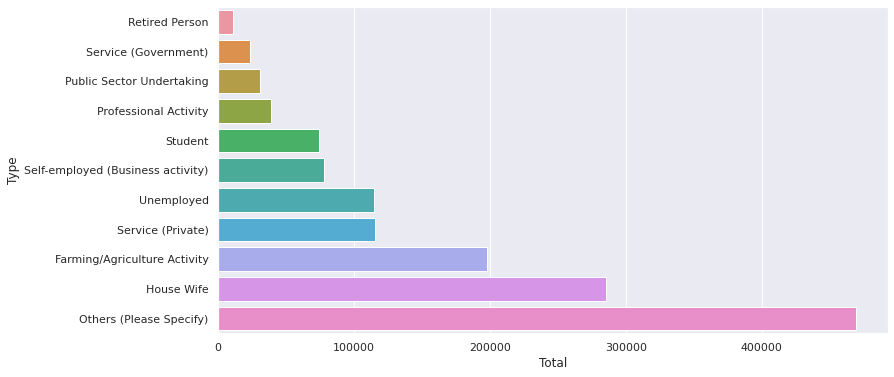

In [ ]:
data_by_proffession_type = pd.DataFrame(data_by_proffession).reset_index().sort_values('Total')
plt.figure(figsize=(12,6))
print('Total people who have their professional mentioned in the data {}'.format(data_by_code.shape[0]))
sns.barplot(x = data_by_proffession_type['Total'], y = data_by_proffession_type['Type'])



Out of the 17782 people whose profession is known to us through the data housewives, farming, private service employees are the majority of people to suicide.

# **Total Suicides In India Means adopted Wise**

In [ ]:
data_by_code = data[data['Type_code'] == 'Means_adopted']
data_by_code['Type'].unique()

data_by_means = data_by_code.groupby('Type')['Total'].sum()
data_by_means

Type
By Consuming Insecticides                  275501
By Consuming Other Poison                  231178
By Drowning                                 96711
By Fire-Arms                                 6294
By Fire/Self Immolation                    128006
By Hanging                                 460955
By Jumping from (Building)                   7871
By Jumping from (Other sites)                8127
By Jumping off Moving Vehicles/Trains        8116
By Machine                                   1661
By Other means                               9238
By Other means (please specify)            135132
By Over Alcoholism                          15973
By Overdose of sleeping pills                9960
By Self Infliction of injury                 5093
By coming under running vehicles/trains     45299
By touching electric wires                  10816
Name: Total, dtype: int64

<Figure size 864x432 with 0 Axes>

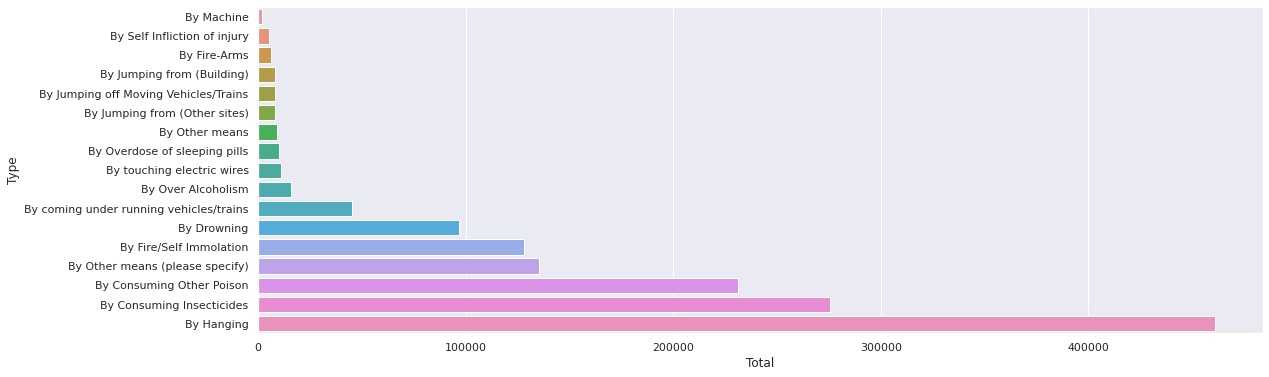

In [ ]:
data_by_means_type = pd.DataFrame(data_by_means).reset_index().sort_values('Total')
plt.figure(figsize=(12,6))
fig , ax = plt.subplots(figsize=(18,6))
g = sns.barplot(x = data_by_means_type['Total'], y = data_by_means_type['Type'])

Hanging, Consuming Insecticides and poison, self immolation are the top means adopted by people who suicide.

# **Total Suicides In India Education Status Wise**

In [ ]:
data_by_code = data[data['Type_code'] == 'Education_Status']
data_by_code['Type'].unique()

data_by_education = data_by_code.groupby('Type')['Total'].sum()
data_by_education

Type
Diploma                                       42459
Graduate                                      93822
Hr. Secondary/Intermediate/Pre-Universit     356724
Matriculate/Secondary                        769698
Middle                                      1028913
No Education                                 965271
Post Graduate and Above                       22425
Primary                                     1088481
Name: Total, dtype: int64

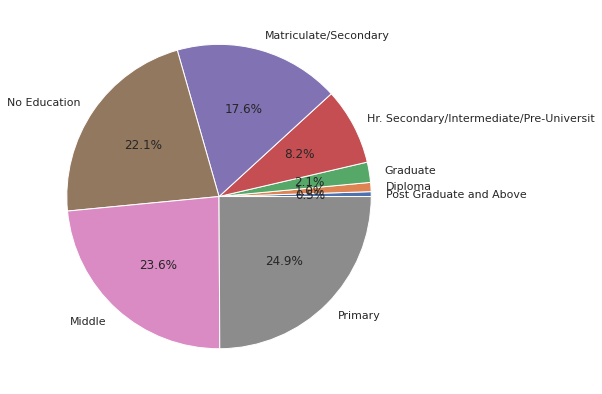

In [ ]:
data_by_education_type = pd.DataFrame(data_by_education).reset_index().sort_values('Total')
#print('Total people who have their social status mentioned in the data {}'.format(df_by_code.shape[0]))
labels = data_by_education_type['Type']
plt.figure(figsize = (13,7))
plt.pie(data_by_education_type['Total'],labels = labels,autopct='%1.1f%%')
plt.show()

A trend which can be observed with higher education there can be seen a dip in the number of suicides.



# **Total Suicides In India Causes Wise**

In [ ]:
data_by_code = data[data['Type_code'] == 'Causes']
data_by_code['Type'].unique()

data_by_causes = data_by_code.groupby('Type')['Total'].sum()
data_by_causes 

Type
Bankruptcy or Sudden change in Economic            32755
Bankruptcy or Sudden change in Economic Status      2655
Cancellation/Non-Settlement of Marriage            11296
Cancer                                              9058
Causes Not known                                  237069
Death of Dear Person                               10321
Divorce                                             4133
Dowry Dispute                                      31970
Drug Abuse/Addiction                               30046
Failure in Examination                             27005
Fall in Social Reputation                          13464
Family Problems                                   341952
Ideological Causes/Hero Worshipping                 2118
Illegitimate Pregnancy                              2494
Illness (Aids/STD)                                  8723
Insanity/Mental Illness                            94229
Love Affairs                                       45039
Not having Children (Barre

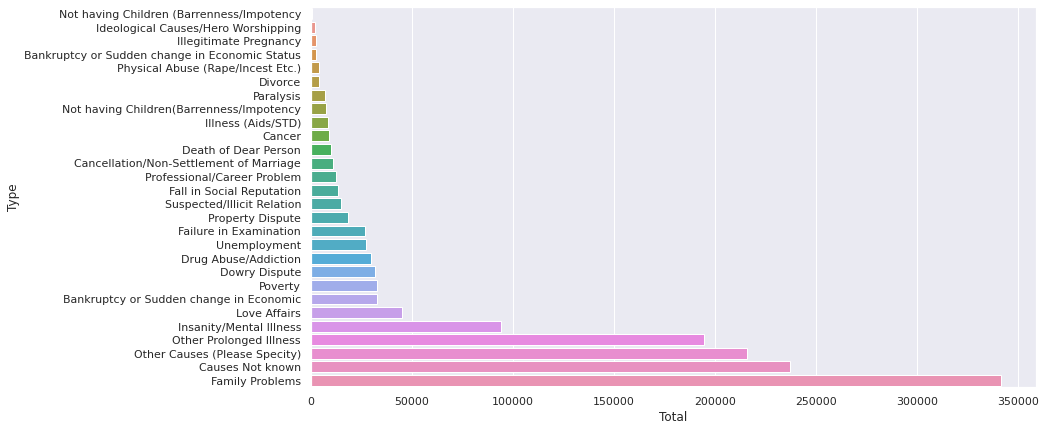

In [ ]:
data_by_causes_type = pd.DataFrame(data_by_causes).reset_index().sort_values('Total')
fig , ax = plt.subplots(figsize=(13,7))
g = sns.barplot(x = data_by_causes_type['Total'], y = data_by_causes_type['Type'])

Top causes of suicide are

1) Family Problems 2) Prolonged Illness 3) Mental Illness 4) Love affairs 5) Bankruptcy or sudden change in economic status

# **Analysing suicide rates in Maharashtra**





In [ ]:
state_data = data.groupby(['State'])
result = state_data['Total'].sum().sort_values()
result

State
Lakshadweep               50
Daman & Diu             1391
Nagaland                1728
Manipur                 2102
D & N Haveli            3430
Mizoram                 4154
Chandigarh              5164
Meghalaya               5415
Arunachal Pradesh       6633
A & N Islands           8109
Sikkim                  9606
Jammu & Kashmir        14821
Goa                    17363
Uttarakhand            18496
Himachal Pradesh       26562
Puducherry             32144
Tripura                45965
Bihar                  46214
Punjab                 46350
Jharkhand              49720
Total (Uts)            53836
Delhi                  84272
Haryana               147176
Assam                 172276
Uttar Pradesh         233352
Rajasthan             255134
Odisha                267234
Chhattisgarh          302354
Gujarat               330858
Madhya Pradesh        451535
Kerala                538946
Karnataka             734825
Andhra Pradesh        814059
Tamil Nadu            818691
West Ben

In [ ]:
mh_data = state_data.get_group('Maharashtra')
mh_data

,State,Year,Type_code,Type,Gender,Age_group,Total
135190,Maharashtra,2001,Causes,Ideological Causes/Hero Worshipping,Female,0-14,0
135191,Maharashtra,2001,Causes,Drug Abuse/Addiction,Female,0-14,0
135192,Maharashtra,2001,Causes,Fall in Social Reputation,Female,0-14,0
135193,Maharashtra,2001,Causes,Insanity/Mental Illness,Female,0-14,12
135194,Maharashtra,2001,Causes,Divorce,Female,0-14,0
...,...,...,...,...,...,...,...
141977,Maharashtra,2012,Social_Status,Seperated,Male,0-100+,30
141978,Maharashtra,2012,Social_Status,Never Married,Male,0-100+,2261
141979,Maharashtra,2012,Social_Status,Divorcee,Male,0-100+,29
141980,Maharashtra,2012,Social_Status,Married,Male,0-100+,8756


In [ ]:
result = mh_data.groupby(['Year'])['Total'].sum()
result

Year
2001    73090
2002    72645
2003    73800
2004    73645
2005    72130
2006    77470
2007    75920
2008    71870
2009    71500
2010    79580
2011    79735
2012    80560
Name: Total, dtype: int64

Text(0.5, 0, 'Years')

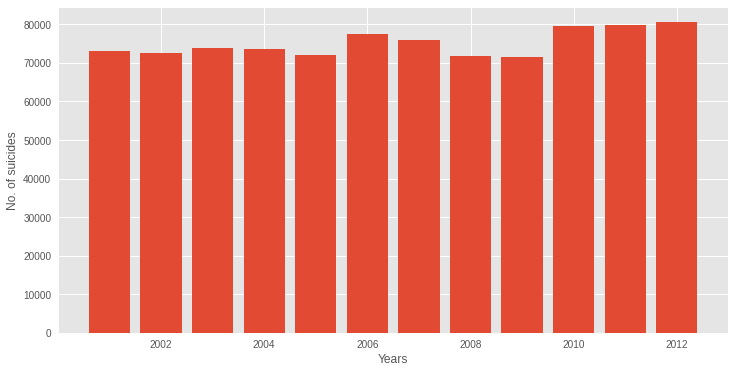

In [ ]:
year = range(2001,2013)
plt.style.use('ggplot')
fig, ax = plt.subplots(1,1, figsize = (12,6))
ax.bar(result.index, result.values)
ax.set_ylabel("No. of suicides")
ax.set_xlabel("Years")


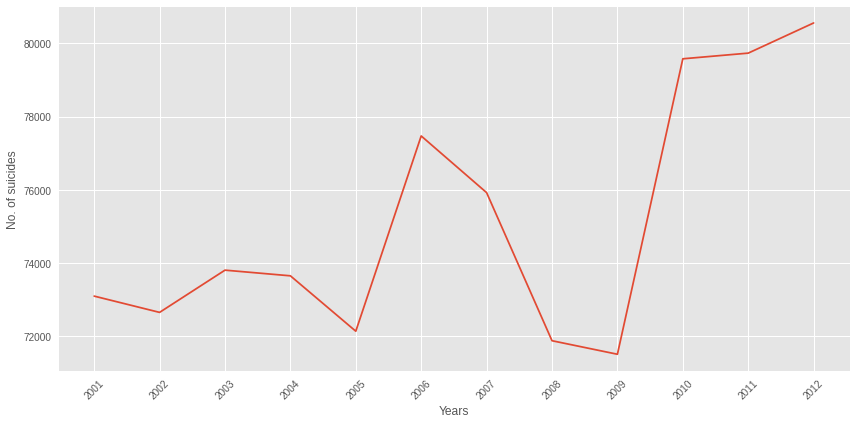

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(result.index, result.values)
plt.xticks(year, rotation = 45)
plt.ylabel("No. of suicides")
plt.xlabel("Years")
plt.tight_layout()
plt.show()

Year 2012 has the highest number, 80,560 suicides. Year 2009 has the lowest number of suicides, 71,500

# **Cause of suicides**

In [ ]:
filt = mh_data["Type_code"] == 'Causes'
mh_data.loc[filt].groupby('Type')['Total'].sum().sort_values(ascending = False)

Type
Family Problems                                   65341
Other Prolonged Illness                           33808
Insanity/Mental Illness                           14859
Drug Abuse/Addiction                              12671
Causes Not known                                   8071
Bankruptcy or Sudden change in Economic Status     7099
Other Causes (Please Specity)                      5154
Unemployment                                       4493
Poverty                                            4083
Dowry Dispute                                      3391
Failure in Examination                             3284
Professional/Career Problem                        3019
Love Affairs                                       2872
Cancellation/Non-Settlement of Marriage            1714
Death of Dear Person                               1585
Not having Children (Barrenness/Impotency          1371
Fall in Social Reputation                          1370
Illness (Aids/STD)                         

Most suicides were because of family problems.



# **Social status**

In [ ]:
filt = mh_data["Type_code"] == 'Social_Status'
result = mh_data.loc[filt].groupby('Type')['Total'].sum().sort_values(ascending = False)
result

Type
Married            134843
Never Married       37539
Widowed/Widower      6157
Seperated             958
Divorcee              892
Name: Total, dtype: int64

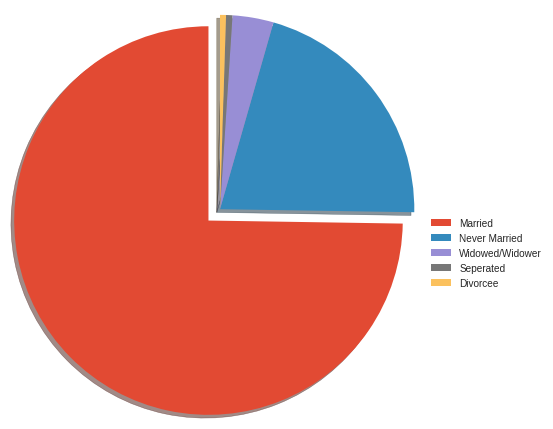

In [ ]:
explode = [0.1,0,0,0,0]
plt.figure(figsize = (12,6))
plt.pie(result.values, explode = explode, shadow= True, startangle = 90,radius=1.2)
plt.tight_layout()
plt.legend(result.index, loc = 2, bbox_to_anchor=(1, 0., 0.5, 0.5))
plt.show()

Most suicides were among married people.



In [ ]:
filt = mh_data["Type"] == 'Married'
mh_data.loc[filt].groupby('Gender')['Total'].sum()

Gender
Female    42023
Male      92820
Name: Total, dtype: int64

Married men tend to suicide more than women



# **Education status**

In [ ]:
filt = mh_data["Type_code"] == 'Education_Status'
result = mh_data.loc[filt].groupby('Type')['Total'].sum().sort_values()
result

Type
Post Graduate and Above                       358
Diploma                                      1377
Graduate                                     2146
Hr. Secondary/Intermediate/Pre-Universit    11715
No Education                                27088
Matriculate/Secondary                       41304
Middle                                      47927
Primary                                     48474
Name: Total, dtype: int64

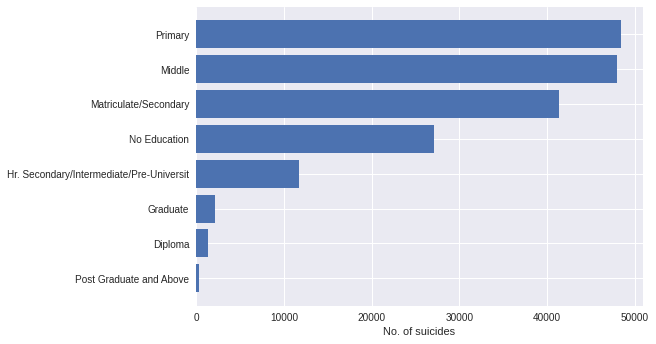

In [ ]:
plt.figure(figsize = (12,6))
plt.style.use("seaborn")
plt.barh(result.index,result.values)
plt.xlabel("No. of suicides")
plt.show()

This stat is very interesting:
People with no education have lower rates of suicide than people with half education.

# **Professional status**

In [ ]:
filt = mh_data["Type_code"] == 'Professional_Profile'
result = mh_data.loc[filt].groupby('Type')['Total'].sum().sort_values()
result

Type
Retired Person                        1727
Public Sector Undertaking             1771
Service (Government)                  2913
Self-employed (Business activity)     5932
Professional Activity                 6665
Student                              10441
Unemployed                           11389
Service (Private)                    19754
Others (Please Specify)              32969
House Wife                           42059
Farming/Agriculture Activity         44769
Name: Total, dtype: int64

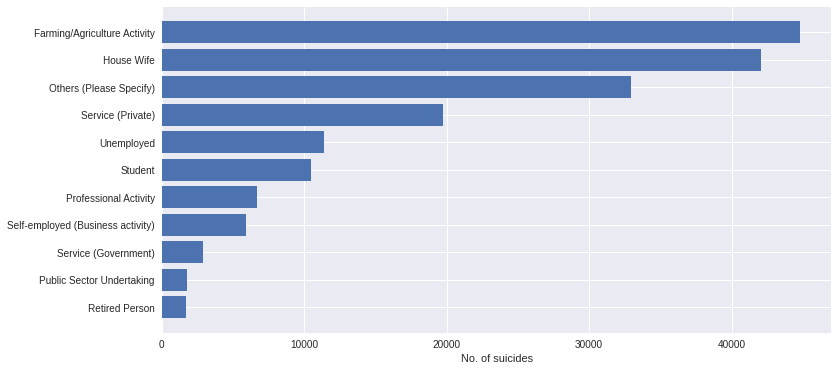

In [ ]:
plt.figure(figsize = (12,6))
plt.style.use("seaborn")
plt.barh(result.index,result.values)
plt.xlabel("No. of suicides")
plt.show()

This stat is more disheartening, suicide rates among farmers is much higher than any other profession.



# **Methods used for suicide**

In [ ]:
filt = mh_data["Type_code"] == 'Means_adopted'
result = mh_data.loc[filt].groupby('Type')['Total'].sum().sort_values()
result

Type
By Machine                                    21
By Other means                               140
By Fire-Arms                                 157
By touching electric wires                   213
By Overdose of sleeping pills                325
By Jumping from (Other sites)                362
By Self Infliction of injury                 414
By Jumping off Moving Vehicles/Trains        550
By Jumping from (Building)                  1164
By Over Alcoholism                          2331
By coming under running vehicles/trains     2565
By Consuming Other Poison                  13248
By Drowning                                18923
By Fire/Self Immolation                    22552
By Consuming Insecticides                  55773
By Hanging                                 61651
Name: Total, dtype: int64

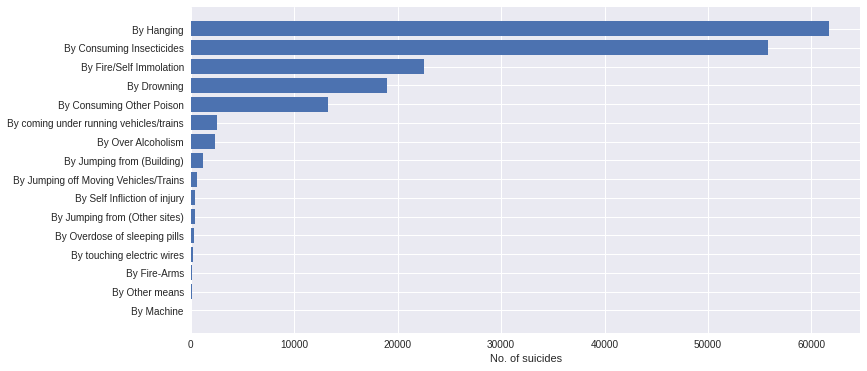

In [ ]:
plt.figure(figsize = (12,6))
plt.style.use("seaborn")
plt.barh(result.index,result.values)
plt.xlabel("No. of suicides")
plt.show()

# **Conclusion**

Males tend to commit more suicides compared to Females in India


Highest no. of suicide cases occur in Maharashtra, West Bengal, and Tamil Nadu.

Male might commit more suicide compared to females in the future if this trend continues.

**People who commit suicide are mostly:**

Married

Farmers and housewives

Youngsters (15-29 age) and middle age (30-44)

# **Thank YOU!**